In [1]:
# Install the OpenCV library necessary for computer vision tasks
!pip install opencv-python-headless  # Use the headless version because GUI operations (like imshow) are not used directly in Colab


In [ ]:
# Import required modules for file handling and OpenCV operations
from google.colab import files
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import io



In [ ]:
car_cascade_path = '/cars.xml'
bus_front_cascade_path = '/Bus_front.xml'
two_wheels_cascade_path = '/two_wheeler.xml'
pedestrain_cascade_path = '/pedestrian.xml'

# Load the Haar cascade files from the specified paths
car_cascade = cv.CascadeClassifier(car_cascade_path)
bus_front_cascade = cv.CascadeClassifier(bus_front_cascade_path)
two_wheels_cascade = cv.CascadeClassifier(two_wheels_cascade_path)
pedestrain_cascade = cv.CascadeClassifier(pedestrain_cascade_path)

In [ ]:
# Define a function to detect objects in a video frame
def detect_objects(frame):
    # Apply a blur to the frame to reduce noise and improve detection accuracy
    blur = cv.blur(frame, (3, 3))
    # Convert the image to grayscale as Haar cascades require gray images
    gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)

    # Detect different types of objects using cascades
    cars = car_cascade.detectMultiScale(gray, 1.01, 1)
    buses = bus_front_cascade.detectMultiScale(gray, 1.01, 1)
    twoWheels = two_wheels_cascade.detectMultiScale(gray, 1.01, 1)
    pedestrains = pedestrain_cascade.detectMultiScale(gray, 1.01, 1)

    # Draw rectangles around detected objects with different colors for identification
    for (x, y, w, h) in cars:
        cv.rectangle(frame, (x,y), (x+w,y+h), (0, 0, 255), 2)  # Red for cars
    for (x, y, w, h) in buses:
        cv.rectangle(frame, (x,y), (x+w,y+h), (255, 0, 0), 2)  # Blue for buses
    for (x, y, w, h) in twoWheels:
        cv.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 255), 2)  # Yellow for two-wheelers
    for (x, y, w, h) in pedestrains:
        cv.rectangle(frame, (x,y), (x+w,y+h), (0, 255, 0), 2)  # Green for pedestrians

    return frame


In [ ]:
# Function to process an uploaded video file using the defined detect_objects function
def process_video(video_file):
    # Open the video file
    vid = cv.VideoCapture(video_file)
    while True:
        ret, frame = vid.read()  # Read each frame from the video
        if not ret:  # Break the loop if no frame is returned
            break
        frame = detect_objects(frame)  # Process frame to detect and mark objects
        cv2_imshow(frame)  # Display the processed frame in Colab
        if cv.waitKey(1) == 27:  # Exit loop if ESC is pressed
            break
    vid.release()  # Release the video capture object
    cv.destroyAllWindows()  # Destroy all OpenCV windows


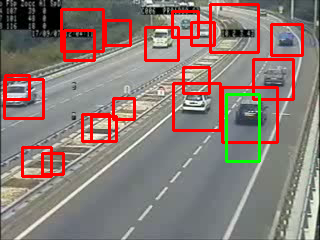

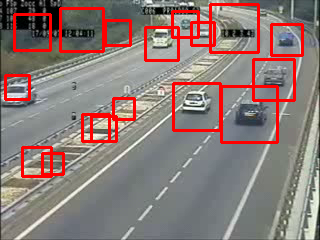

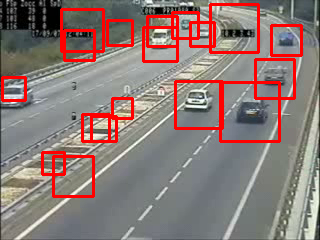

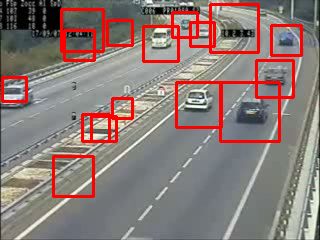

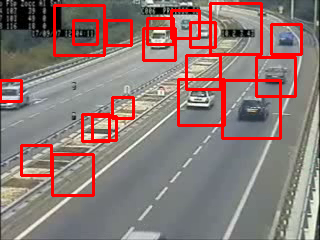

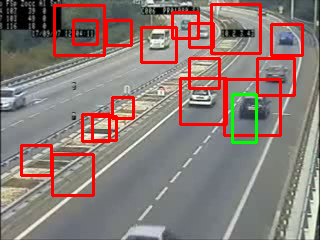

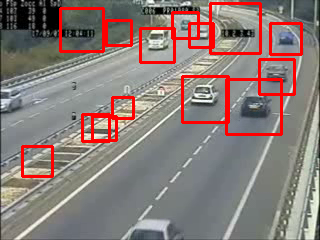

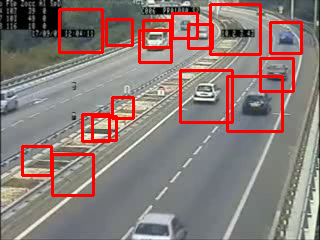

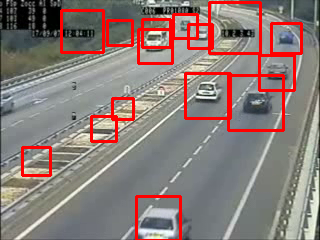

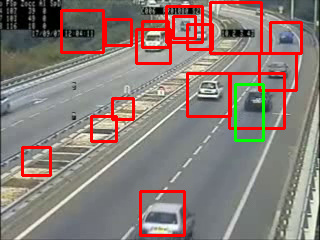

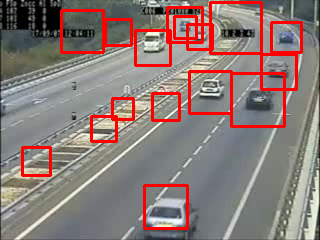

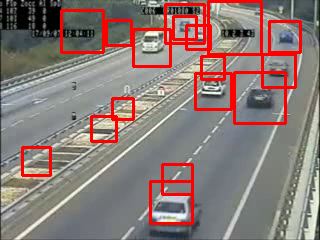

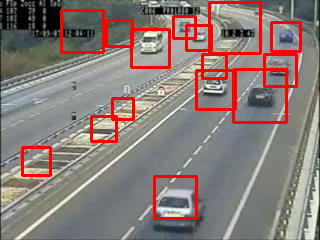

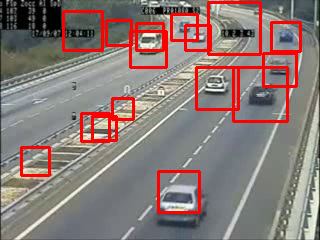

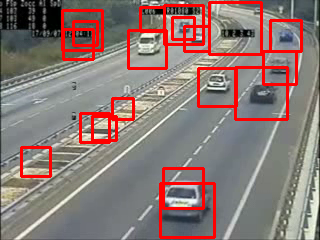

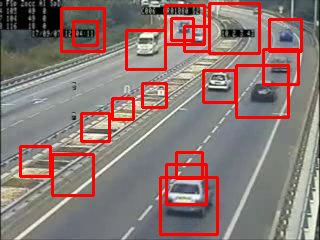

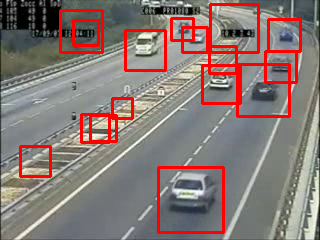

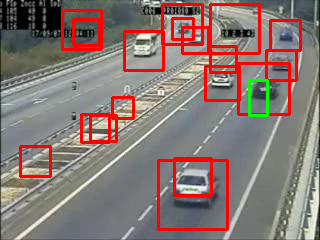

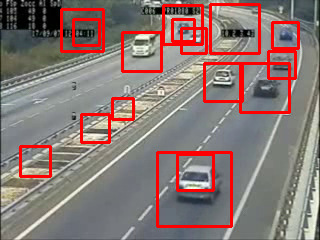

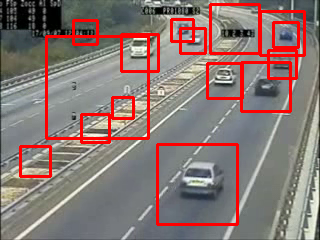

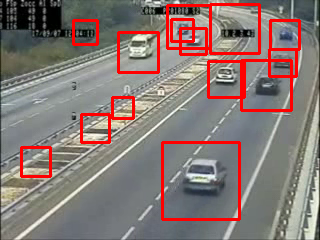

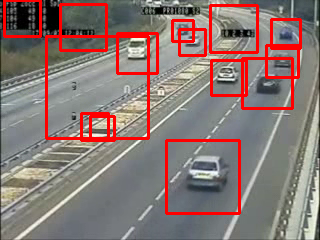

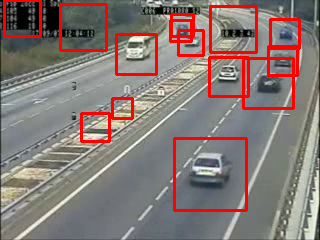

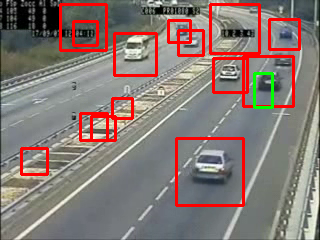

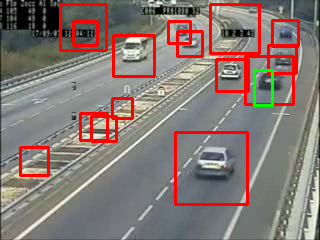

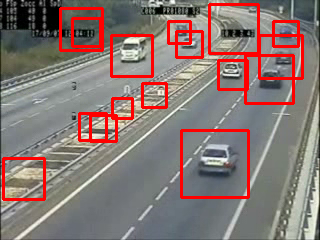

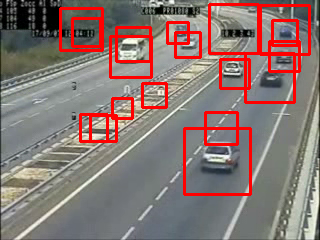

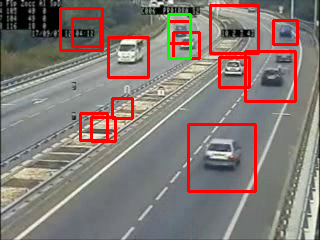

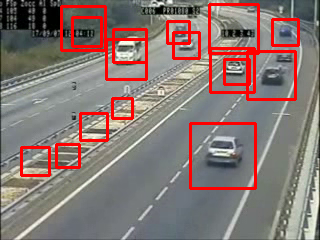

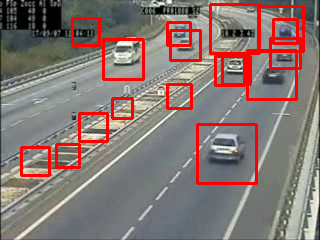

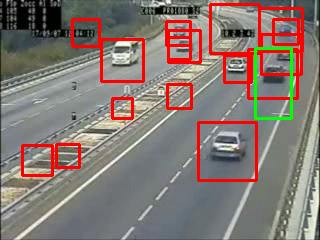

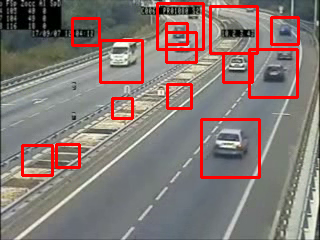

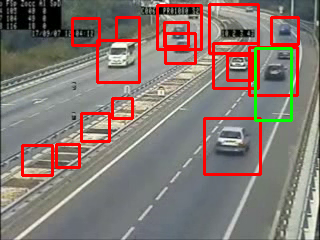

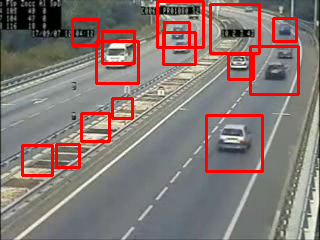

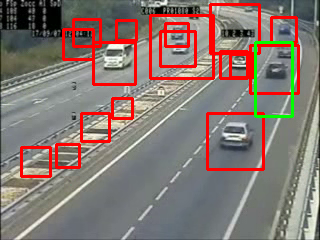

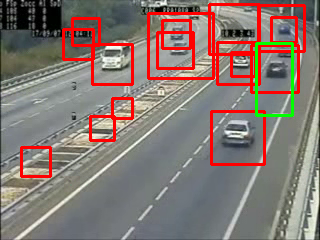

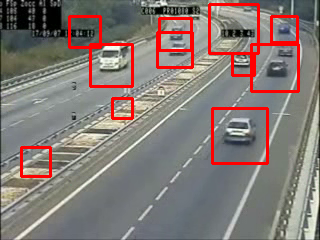

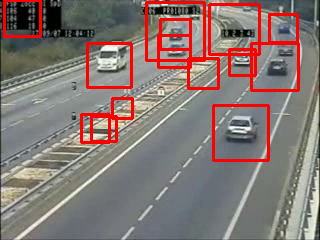

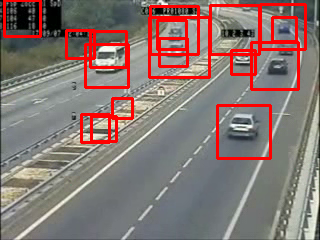

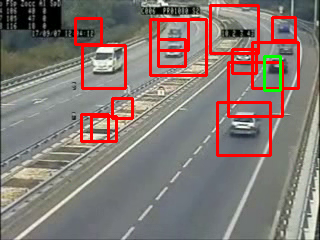

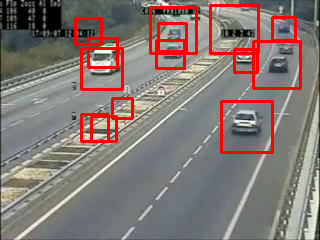

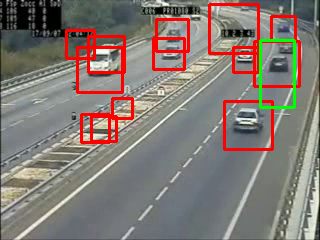

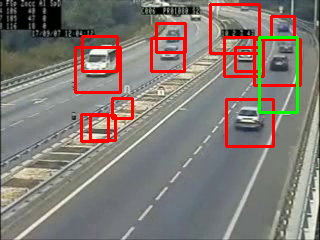

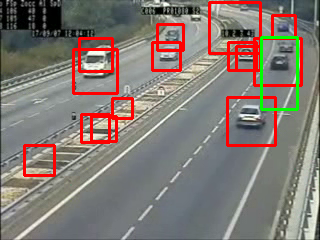

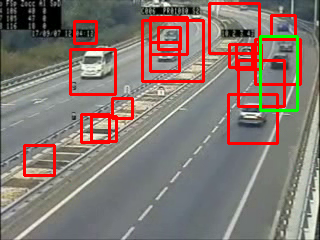

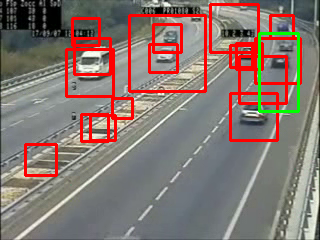

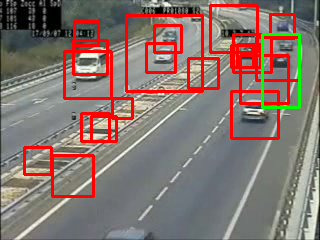

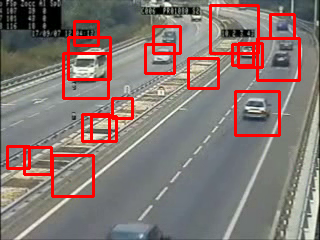

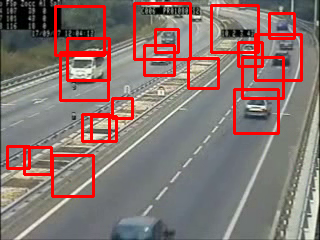

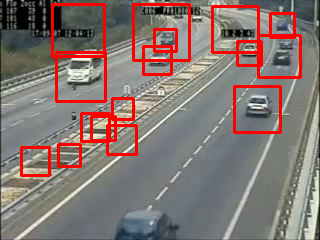

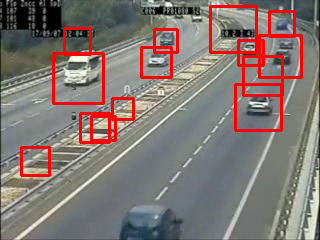

KeyboardInterrupt: 

In [ ]:
# Prompt the user to upload a video file for processing
video_uploaded = '/video.avi'
video_name = next(iter(video_uploaded))
process_video(video_uploaded)  # Call the process_video function to detect objects in the uploaded video
